## 4.1 多层感知机

### 4.1.1 隐藏层

### 4.1.2 激活函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

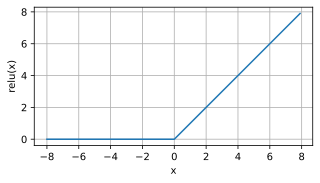

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

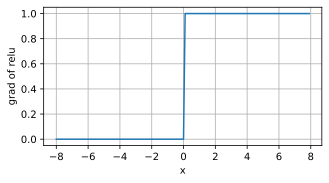

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)

d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

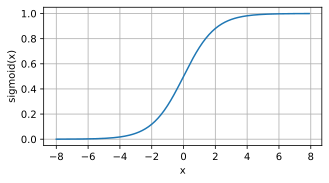

In [4]:
y = torch.sigmoid(x)

d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

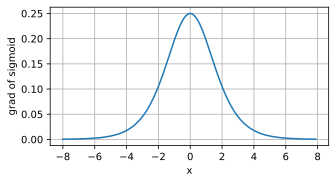

In [5]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

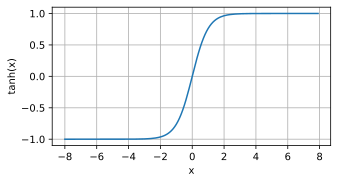

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

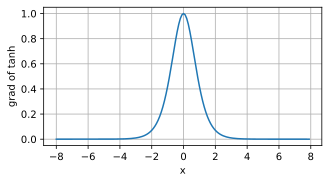

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 练习

1. pReLU的导数

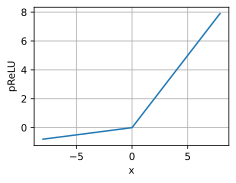

In [8]:
alpha = torch.tensor(0.1)
x = torch.arange(-8, 8, 0.1, requires_grad=True)
y = torch.prelu(x, alpha)
d2l.plot(x.detach(), y.detach(), 'x', 'pReLU')

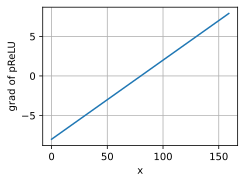

In [9]:
d2l.plot(x.detach(), x.grad, 'x', 'grad of pReLU')

2. 证明不了一点。
3. 显然

4. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。这会导致什么样的问题

- 饱和 梯度消失
- 梯度爆炸
- 批量过大可能会引起效率降低的问题

## 4.2 MLP从0开始实现

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1 初始化模型参数

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [11]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

### 4.2.3 模型

In [12]:
def net(X):
  X = X.reshape((-1, num_inputs))
  # 这里的@表示矩阵乘法
  H = relu(X@W1 + b1)
  return (H@W2 + b2)

### 4.2.4 损失函数

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5 训练

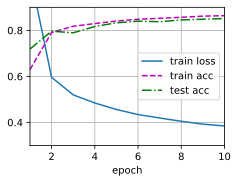

In [14]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

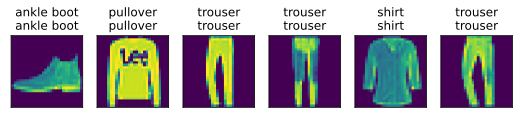

In [15]:
d2l.predict_ch3(net, test_iter)

1. 在所有其他参数保持不变的情况下，更改超参数num_hiddens的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。

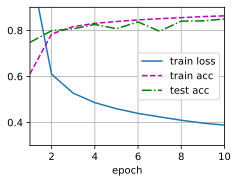

In [18]:
# 改为128个隐藏层节点

num_inputs, num_outputs, num_hiddens = 784, 10, 128

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

updater = torch.optim.SGD(params, lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

2. 尝试添加更多隐藏层

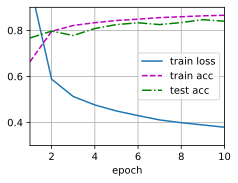

In [20]:
# 改为512个隐藏层节点

num_inputs, num_outputs, num_hiddens = 784, 12, 512

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

updater = torch.optim.SGD(params, lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

3.4. 我Core i5-9300的CPU撑不住了，有缘再见吧。。。

5. 因为参数过多，参数维度更高，调参更不容易
6. 不知道。

## 4.3 多层感知机的简洁实现

In [22]:
import torch
from torch import nn
from d2l import torch as d2l

### 4.3.1 模型

In [23]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [24]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

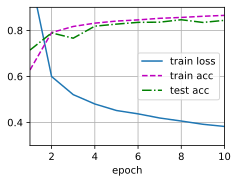

In [25]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

1. 添加不同的隐藏层或者修改lr，达到最好效果，太麻烦了不弄了

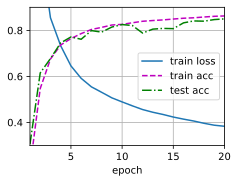

In [22]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.ReLU(),
                    nn.Linear(256, 256), nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.05, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


2. 尝试使用不同的激活函数查看效果

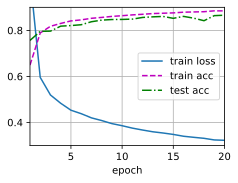

In [23]:
# ReLU

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

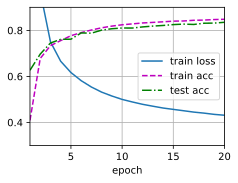

In [24]:
# Sigmoid

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.Sigmoid(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

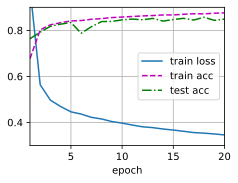

In [25]:
# Tanh

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.Tanh(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

3. 权重初始化方式

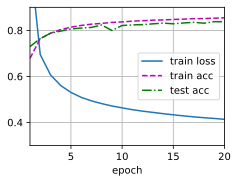

In [30]:
# xavier_normal_

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.Sigmoid(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.xavier_normal_(m.weight)

net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

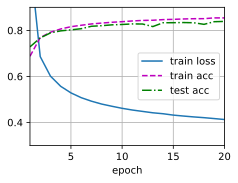

In [31]:
# 凯明初始化

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256), nn.Sigmoid(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.kaiming_normal_(m.weight)

net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 20
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.4 模型选择，欠拟合和过拟合

### 4.4.4 多项式回归

In [1]:
import math
import numpy as np
import torch 
from torch import nn
from d2l import torch as d2l

In [7]:
# 多项式最大阶数
max_degree = 20
# 训练集和测试集的大小
n_train, n_test = 100, 100
# 真实的w，先分配20个空间
true_w = np.zeros(max_degree)
# 真实的w
true_w[0: 4] = np.array([5, 1.2, -3.4, 5.6])

# 初始特征用正态分布初始化，然后洗牌
features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)

# 进行乘方
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))

# 除以gamma值防止过大
for i in range(max_degree):
  poly_features[:, i] /= math.gamma(i + 1)

# 设置标签并添加噪声
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [8]:
# 将这些变量转化为 tensor
true_w, features, poly_features, labels = [
  torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [9]:
# 查看一下
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.8755],
         [-2.6595]]),
 tensor([[ 1.0000e+00, -8.7553e-01,  3.8328e-01, -1.1186e-01,  2.4483e-02,
          -4.2872e-03,  6.2559e-04, -7.8246e-05,  8.5634e-06, -8.3305e-07,
           7.2936e-08, -5.8053e-09,  4.2356e-10, -2.8526e-11,  1.7839e-12,
          -1.0413e-13,  5.6979e-15, -2.9345e-16,  1.4274e-17, -6.5773e-19],
         [ 1.0000e+00, -2.6595e+00,  3.5364e+00, -3.1350e+00,  2.0844e+00,
          -1.1087e+00,  4.9141e-01, -1.8670e-01,  6.2065e-02, -1.8340e-02,
           4.8775e-03, -1.1792e-03,  2.6134e-04, -5.3464e-05,  1.0156e-05,
          -1.8007e-06,  2.9930e-07, -4.6823e-08,  6.9180e-09, -9.6833e-10]]),
 tensor([  2.0237, -27.9480]))

In [10]:
# 评估损失
def evaluate_loss(net, data_iter, loss): #@save
  # 损失总和，样本数量
  metric = d2l.Accumulator(2)
  for X, y in data_iter:
    out = net(X)
    y = y.reshape(out.shape)
    l = loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]

In [24]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
  # 定义了如何处理损失函数对每个元素的计算结果。
  # 如果设置为none，损失函数将不会进行任何降维处理，即它会返回每个元素的损失，结果的形状与输入相同。
  loss = nn.MSELoss(reduction='none')
  input_shape = train_features.shape[-1]
  net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
  batch_size = min(10, train_labels.shape[0])
  
  train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
  test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size, is_train=False)

  trainer = torch.optim.SGD(net.parameters(), lr=0.01)

  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                          xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                          legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch == 0 or (epoch + 1) % 20 == 0:
      animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                               evaluate_loss(net, test_iter, loss)))

  print('weight: ', net[0].weight.data.numpy())
  return evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)


weight:  [[ 4.9996295  1.2342333 -3.4008012  5.573518 ]]


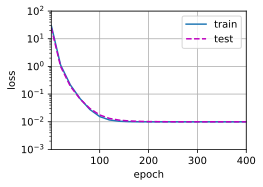

In [18]:
# 3阶 - 正常

train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight:  [[ 4.446327  4.484044 -1.901135]]


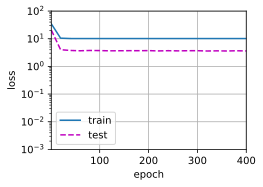

In [85]:
# 2阶 欠拟合

# 3阶 - 正常

train(poly_features[:n_train, :3], poly_features[n_train:, :3],
      labels[:n_train], labels[n_train:])

weight:  [[ 4.958727    1.4024388  -3.1916475   4.7522407  -0.40275535  1.6414583
  -0.10038534  0.10298093  0.01743999  0.13187285 -0.04010441 -0.0905015
   0.0437792  -0.0639245   0.25023502]]


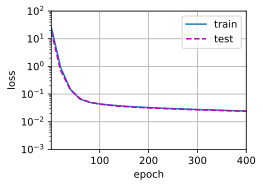

In [90]:
# 高阶 过拟合

train(poly_features[:n_train, :15], poly_features[n_train:, :15],
      labels[:n_train], labels[n_train:])

### 练习

1. 这个多项式回归问题可以准确地解出吗？提示：使用线性代数。

应该可以，但我不会。

2. 考虑多项式的模型选择。
  - 绘制训练损失与模型复杂度（多项式的阶数）的关系图。观察到了什么？需要多少阶的多项式才能将训练损失减少到0?
  - 在这种情况下绘制测试的损失图。
  - 生成同样的图，作为数据量的函数。

In [20]:
from d2l import torch as d2l

In [ ]:
train_loss = []
test_loss = []
for i in range(2, 20):
      trainloss, testloss = train(poly_features[:n_train, :4], poly_features[n_train:, :4], 
                                  labels[:n_train], labels[n_train:], num_epochs=250)
      train_loss.append(trainloss)
      test_loss.append(testloss)

经过实验可知，无论多少阶都不能降到0，都只能降到1e-2

weight:  [[ 4.999932   1.2353916 -3.4008155  5.5718756]]


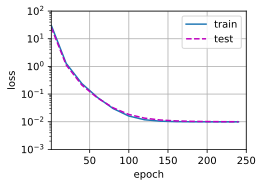

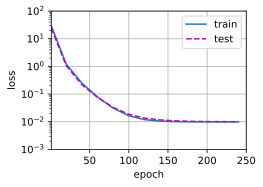

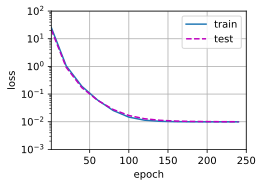

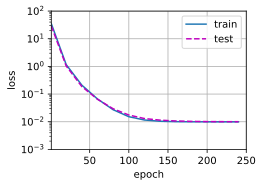

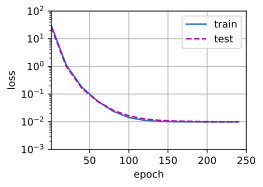

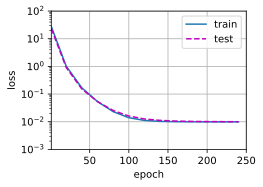

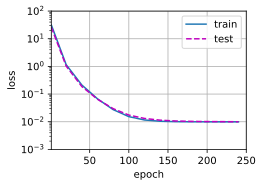

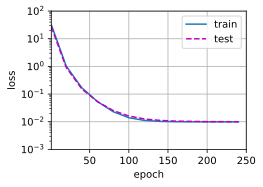

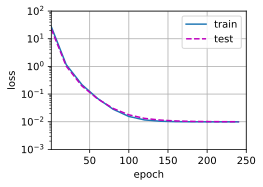

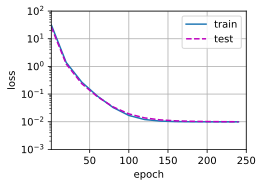

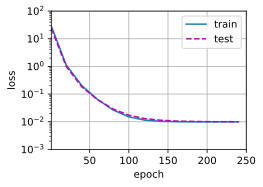

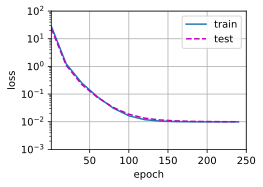

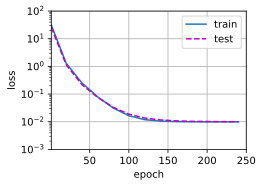

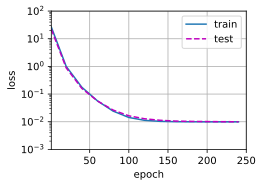

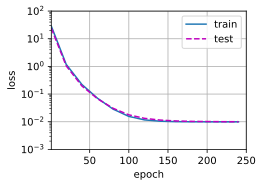

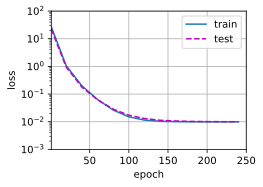

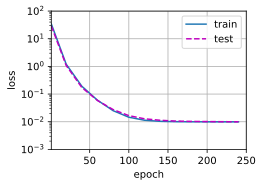

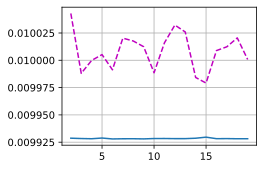

In [28]:
train_loss = []
test_loss = []
for i in range(2, 20):
      trainloss, testloss = train(poly_features[:n_train, :4], poly_features[n_train:, :4], 
                                  labels[:n_train], labels[n_train:], num_epochs=250)
      train_loss.append(trainloss)
      test_loss.append(testloss)

d2l.plot([range(2,20)], [train_loss, test_loss], legend=['train_loss', 'test_loss'])


3. 如果不对多项式特征进行标准化，会发生什么事情？能用其他方法解决这个问题吗？

会导致Y过大，从而难以收敛

4. 泛化误差可能为零吗？

不能。

## 4.5 权重衰减

### 4.5.1 高维线性回归

In [30]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [31]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 4.5.2 从0开始实现

In [32]:
def init_params():
  w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
  b = torch.zeros(1, requires_grad=True)
  return [w, b]

In [33]:
def l2_penalty(w):
  return torch.sum(w.pow(2)) / 2

In [96]:
def train(lambd):
  w, b = init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr = 100, 0.03
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', 
                          xlim=[5, num_epochs], legend=['train', 'test'])

  for epoch in range(num_epochs):
    for X, y in train_iter:
      # l2范数的惩罚项
      # l2_penalty让其成为一个长度为batchsize的向量
      l = loss(net(X), y) + lambd * l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w, b], lr, batch_size)
    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  
  print('w的L2范数是', torch.norm(w).item())

w的L2范数是 12.946325302124023


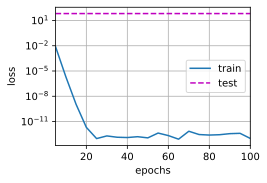

In [97]:
# 出现严重的过拟合

train(lambd=0)

w的L2范数是 0.03202824667096138


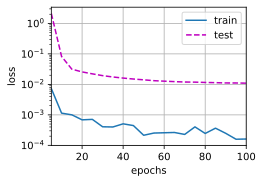

In [98]:
# 使用了权重衰减

train(lambd=3)

### 4.5.3 简洁实现

In [111]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()

  loss = nn.MSELoss(reduction='none')
  num_epochs, lr = 100, 0.003

  trainer = torch.optim.SGD([
    {"params": net[0].weight, 'weight_decay': wd},
    {"params": net[0].bias}], lr=lr)
  
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', 
                        xlim=[5, num_epochs], legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.mean().backward()
      trainer.step()

    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, 
                              (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  
  print('w的L2范数是', net[0].weight.norm().item())

w的L2范数是 14.328439712524414


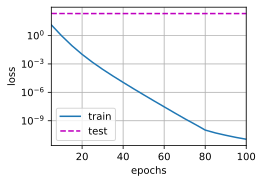

In [112]:
train_concise(0)

w的L2范数是 0.5423998832702637


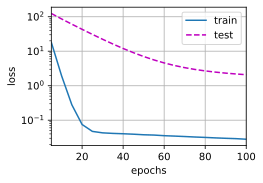

In [113]:
train_concise(3)

### 练习

1. 绘制训练和测试精度关于lambda的函数

In [34]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()

  loss = nn.MSELoss(reduction='none')
  num_epochs, lr = 100, 0.003

  trainer = torch.optim.SGD([
    {"params": net[0].weight, 'weight_decay': wd},
    {"params": net[0].bias}], lr=lr)
  
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.mean().backward()
      trainer.step()

  return d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)

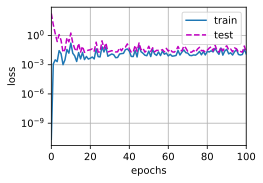

In [36]:
animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', 
                        xlim=[0, 100], legend=['train', 'test'])

for wd in range(101):
  trainloss, testloss = train_concise(wd)
  animator.add(wd, (trainloss, testloss))
    

In [38]:
# 其他的不想做了

## 4.6 暂退法 Dropout

### 4.6.4 从0开始实现

In [39]:
import torch
from torch import nn 
from d2l import torch as d2l

In [40]:
def dropout_layer(X, dropout):
  assert 0 <= dropout <= 1
  # 所有元素都被丢弃
  if dropout == 1:
    return torch.zeros_like(X)
  # 所有元素都保留
  if dropout == 0:
    return X
  
  # 随机生成数字，大于dropout值生成掩码
  """
  -> 为什么需要转换成float格式？
  数据类型一致性：在 PyTorch 中，进行任何张量的算术运算时，参与运算的张量需要具有相同的数据类型。
  
  -> 为什么要除以（1.0 - dropout)
  缩放操作：在应用 dropout 后，通常需要对未被丢弃的数据进行缩放，以保持其在统计上的期望不变。这个缩放因子是 1.0 / (1.0 - dropout)，一个浮点数。为了执行这个缩放操作，掩码以及结果张量必须是浮点类型，以确保数值的精确度和计算的正确性。
  """
  mask = (torch.rand(X.shape) > dropout).float()
  return mask * X / (1.0 - dropout)

In [41]:
X = torch.arange(16, dtype=torch.float32).reshape((2,8))
print(X)
print(dropout_layer(X, 0))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  0.,  8.,  0.,  0., 14.],
        [ 0., 18., 20., 22.,  0.,  0.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [5]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [7]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
  def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
               is_training=True):
    super(Net, self).__init__()
    
    self.num_inputs = num_inputs
    self.training = is_training
    self.lin1 = nn.Linear(num_inputs, num_hiddens1)
    self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
    self.lin3 = nn.Linear(num_hiddens2, num_outputs)
    self.relu = nn.ReLU()
  
  def forward(self, X):
    H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))

    if self.training == True:
      H1 = dropout_layer(H1, dropout1)

    H2 = self.relu(self.lin2(H1))

    if self.training == True:
      H2 = dropout_layer(H2, dropout2)

    out = self.lin3(H2)
    return out
    

In [8]:
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

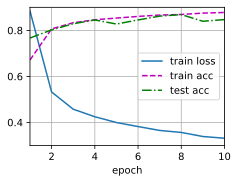

In [9]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.6.5 简洁实现

In [52]:
dropout1, dropout2 = 0.2, 0.5

net = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Dropout(dropout1),
  nn.Linear(256, 256),
  nn.ReLU(),
  nn.Dropout(dropout2),
  nn.Linear(256, 10)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

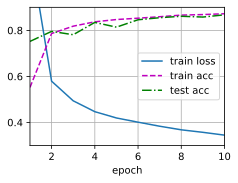

In [11]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 练习

1. 如果更改第一层和第二层的暂退法概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述该结果，并总结定性的结论。

In [56]:
dropout1, dropout2 = 0.5, 0.2
num_epochs, lr, batch_size = 10, 0.5, 256

loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

net = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Dropout(dropout1),
  nn.Linear(256, 256),
  nn.ReLU(),
  nn.Dropout(dropout2),
  nn.Linear(256, 10)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

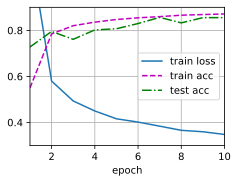

In [55]:
# dropout1, dropout2 = 0.2, 0.5

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

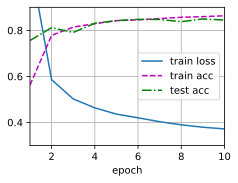

In [57]:
# dropout1, dropout2 = 0.5, 0.2

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

2. 增加训练轮数，并将使用暂退法和不使用暂退法时获得的结果进行比较

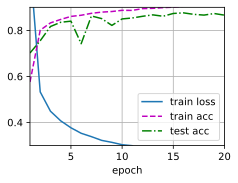

In [60]:
# 不使用暂退法

num_epochs, lr, batch_size = 30, 0.5, 256

loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

net = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Linear(256, 256),
  nn.ReLU(),
  nn.Linear(256, 10)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

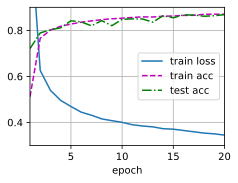

In [61]:
# 使用暂退法

dropout1, dropout2 = 0.5, 0.2
num_epochs, lr, batch_size = 30, 0.5, 256

loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

net = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Dropout(dropout1),
  nn.Linear(256, 256),
  nn.ReLU(),
  nn.Dropout(dropout2),
  nn.Linear(256, 10)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

3. 当应用或不应用暂退法时，每个隐藏层中激活值的方差是多少？绘制一个曲线图，以显示这两个模型的每个隐藏层中激活值的方差是如何随时间变化的。

- 以后再看吧

4. 为什么在测试时通常不使用暂退法？【来自ChatGPT】

- 保持一致性。Dropout 在训练时通过随机地丢弃网络中的部分连接（即神经元输出置为零），来模拟一个更健壮的网络，减少神经元间复杂的共适应关系；但是，在模型评估的时候需要的是模型的确定性输出，以确保评估的结果是一致和可重复的。使用 dropout 将引入不必要的随机性，影响模型输出的一致性。
- 利用全部能力。训练时使用 dropout 目的是模拟较小、不同子网络的集成效果，以此提高泛化能力。但在实际使用模型（测试/预测时）时，希望利用网络的全部计算能力，即所有神经元和连接。因此，需要关闭 dropout，使得每个神经元都参与到前向传播中。
- 评估模型的真实性能。测试阶段的目的是评估模型在整个训练数据上学到的性能，而不是其在可能的一部分训练数据上的表现。关闭 dropout，可以观察到模型在学习到所有训练数据情况下的真实表现。

5. 以本节中的模型为例，比较使用暂退法和权重衰减的效果。如果同时使用暂退法和权重衰减，会发生什么情况？结果是累加的吗？收益是否减少（或者说更糟）？它们互相抵消了吗？

再说吧。

6. 如果我们将暂退法应用到权重矩阵的各个权重，而不是激活值，会发生什么？

这种方式叫做DropConnect

DropConnect
- 定义：在 DropConnect 中，不是随机将激活值置为零，而是直接在网络的权重上进行随机置零。具体来说，网络中每个权重的连接都有一定的概率被随机断开（权重设为零）。
- 影响：由于是直接对权重进行操作，这影响了网络的整体架构和连接模式，而不仅仅是激活值的流动。DropConnect 通过这种方式引入正则化，可能使网络在训练过程中学习到更加稳健的权重分布。

传统的 Dropout
- 定义：在标准的 Dropout 中，网络在训练期间会随机将部分神经元的激活值置为零，这通常发生在非线性激活函数之后。
- 影响：这种做法模拟了神经元的随机失活，迫使网络不依赖于任何单一的输入特征，从而提高了模型的泛化能力。它影响的是数据流动，而非权重结构本身。

将 DropConnect 应用到权重矩阵的潜在后果
- 模型复杂度与过拟合：通过随机断开权重连接，DropConnect 可以有效地减少模型的复杂度，这有助于防止过拟合。这种方法特别适用于大型网络，其中模型的参数非常多。
- 训练稳定性：与 Dropout 相比，DropConnect 可能对网络的训练稳定性有更大影响，因为它直接改变了网络的结构。这可能导致训练过程中出现更大的方差。
- 计算效率：DropConnect 可能需要额外的计算资源来处理权重的随机化过程，特别是在大型网络中。


7. 先不做了

## 4.7 前向传播、反向传播和计算图

## 4.8 数值稳定性和模型初始化

### 4.8.1 梯度消失和梯度爆炸

In [12]:
%matplotlib inline
import torch
from d2l import torch as d2l

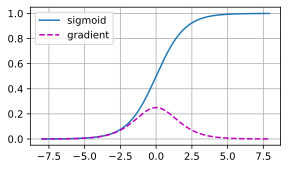

In [13]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [15]:
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵', M)
for i in range(100):
  M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘100个矩阵之后', M)

一个矩阵 tensor([[-0.1241,  0.0670, -0.5387,  0.1195],
        [ 1.6523, -0.0032, -0.1892,  0.7816],
        [ 1.0389,  0.0692, -1.6227,  2.1898],
        [ 0.8950, -0.5756,  1.2192,  0.1183]])
乘100个矩阵之后 tensor([[-6.4934e+23, -3.1907e+22,  1.2794e+23,  1.0153e+23],
        [-3.2252e+24, -1.5847e+23,  6.3545e+23,  5.0430e+23],
        [-6.7465e+24, -3.3150e+23,  1.3292e+24,  1.0549e+24],
        [ 4.5543e+23,  2.2378e+22, -8.9732e+22, -7.1212e+22]])


1. 除了多层感知机的排列对称性之外，还能设计出其他神经网络可能会表现出对称性且需要被打破的情况吗？

2. 我们是否可以将线性回归或softmax回归中的所有权重参数初始化为相同的值？

3. 在相关资料中查找两个矩阵乘积特征值的解析界。这对确保梯度条件合适有什么启示？

4. 如果我们知道某些项是发散的，我们能在事后修正吗？看看关于按层自适应速率缩放的论文 (You et al., 2017) 。

## 4.9 环境和分布偏移

练习不会。来日再战

## 4.10 实战Kaggle比赛：预测房价

### 4.10.1 下载和缓存数据集

In [7]:
import hashlib
import os
import tarfile
import zipfile
import requests

#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [2]:


def download(name, cache_dir=os.path.join('data')): #@save
  assert name in DATA_HUB, f'{name} 不存在于 {DATA_HUB}'

  url, sha1_hash = DATA_HUB[name]
  os.makedirs(cache_dir, exist_ok=True)
  fname = os.path.join(cache_dir, url.split('/')[-1])

  if os.path.exists(fname):
    sha1 = hashlib.sha1()
    with open(fname, 'rb') as f:
      while True:
        data = f.read(1048579)
        if not data:
          break
        sha1.update(data)
    
    if sha1.hexdigest() == sha1_hash:
      return fname
    
  print(f'downloading {fname} from {url}')
  r = requests.get(url, stream=True, verify=True)
  
  with open(fname, 'wb') as f:
    f.write(r.content)
  
  return fname


In [3]:
"""
下载并 解压指定的zip或者tar文件。
"""
def download_extract(name, folder=None): #@save
  fname = download(fname)
  base_dir = os.path.dirname(fname)
  data_dir, ext = os.path.splitext(fname)
  if ext == '.zip':
    fp = zipfile.ZipFile(fname, 'r')
  elif ext in ('.tar', '.gz'):
    fp = tarfile.open(fname, 'r')
  else:
    assert False, 'should be tar or zip'

  fp.extractall(base_dir)
  return os.path.join(base_dir, folder) if folder else data_dir

def download_all():
  for name in DATA_HUB:
    download(name)

### 4.10.3 访问和读取数据集

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch 
from torch import nn
from d2l import torch as d2l

In [8]:
DATA_HUB['kaggle_house_train'] = ( #@save
  DATA_URL + 'kaggle_house_pred_train.csv', '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = ( #@save
  DATA_URL + 'kaggle_house_pred_test.csv', 'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [9]:
# 读取训练数据和测试数据

train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

downloading data\kaggle_house_pred_train.csv from http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv
downloading data\kaggle_house_pred_test.csv from http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv


In [10]:
"""
查看训练集和测试集的形状
训练集有1460行，81个特征，80X+1y
测试集有1459行，80个特征，也就是80X
"""

print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [12]:
# 查看训练集的前4行的钱4列和后3列

print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [13]:
# 所有特征进行连接
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

### 4.10.4 数据预处理

In [15]:
# 获得所有数值型特征的索引
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
# 将数值型特征的索引进行标准化
all_features[numeric_features] = all_features[numeric_features].apply(
  lambda x: (x - x.mean()) / (x.std())
)
# 标准化数据之后均值为0，因此可以直接将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [16]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

In [18]:
n_train = train_data.shape[0]

# 将训练集和测试机转化为张量
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)

# 训练标签转化为张量
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

### 4.10.5 训练

In [19]:
# 损失函数
loss = nn.MSELoss()
# 输入特征个数
in_features = train_features.shape[1]
# 线性层，输入in_features，输出1
def get_net():
  net = nn.Sequential(nn.Linear(in_features, 1))
  return net

In [4]:
"""
什么是MSE和RMSE（来自ChatGPT）

均方误差（MSE, Mean Squared Error）和均方根误差（RMSE, Root Mean Squared Error）是评估模型性能、特别是在回归任务中常用的两种度量方法。

1. MSE

- 性能评估：MSE 提供了一个简单直接的方式来衡量模型预测的平均误差幅度。它是最常用的回归性能指标之一。
- 优化目标：在机器学习中，尤其是在使用线性回归和神经网络等模型时，MSE 常被用作损失函数，模型训练的目标就是最小化 MSE。
- 特点：MSE 对较大的误差给予更高的惩罚（由于平方项），因此在含有异常值的数据中可能会导致模型偏向于这些点。

2. RMSE

- 性能评估：与 MSE 类似，RMSE 也用于衡量模型的性能。它通常更受欢迎，因为它保持了与原始数据相同的量纲（尺度），使得解释更直观。
- 比较模型：由于 RMSE 与目标变量在同一尺度上，它使得不同模型或不同数据集上的性能比较更为直接和有意义。
- 特点：与 MSE 相比，RMSE 对误差的量纲更敏感，更适合于比较和直观展示。RMSE 的解释性更强，因为它返回的是与原始数据相同单位的值。

"""

# RMSE均方根误差
def log_rmse(net, features, labels):
  clipped_preds = torch.clamp(net(features), 1, float('inf'))
  rmse = torch.sqrt(loss(torch.log(clipped_preds),
                         torch.log(labels)))
  return rmse.item()

In [22]:
# 训练
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
  train_ls, test_ls = [], []
  # 获取训练集迭代器，以minibatch进行训练
  train_iter = d2l.load_array((train_features, train_labels), batch_size)
  # 优化器
  optimizer = torch.optim.Adam(net.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
  # 进行训练
  for epoch in range(num_epochs):
    for X, y in train_iter:
      optimizer.zero_grad()
      l = loss(net(X), y)
      l.backward()
      optimizer.step()
    train_ls.append(log_rmse(net, train_features, train_labels))
    if test_labels is not None:
      test_ls.append(log_rmse(net, test_features, test_labels))
    
  return train_ls, test_ls

In [23]:
# KFold交叉验证
def get_k_fold_data(k, i, X, y):
  assert k > 1
  # 获取整除的容量大小
  fold_size = X.shape[0] // k
  X_train, y_train = None, None
  # 进行K折训练
  for j in range(k):
    # 获取训练集索引
    idx = slice(j * fold_size, (j + 1) * fold_size)
    # 获取X和y
    X_part, y_part = X[idx, :], y[idx]
    # 选择第i个切片的数据作为验证数据，其他数据是训练数据。
    if j == i:
      X_valid, y_valid = X_part, y_part
    elif X_train is None:
      X_train, y_train = X_part, y_part
    else:
      X_train = torch.cat([X_train, X_part], 0)
      y_train = torch.cat([y_train, y_part], 0)
  return X_train, y_train, X_valid, y_valid

In [29]:
def k_fold(k, X_train, y_train, num_epochs, 
           learning_rate, weight_decay,batch_size):
  train_l_sum, valid_l_sum = 0, 0
  for i in range(k):
    # 获取第k折数据
    data = get_k_fold_data(k, i, X_train, y_train)
    net = get_net()
    # 训练并获取损失值
    train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)
    train_l_sum += train_ls[-1]
    valid_l_sum += valid_ls[-1]
    if i == 0:
      d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
               xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
               legend=['train', 'valid'], yscale='log')

    print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
          f'验证log rmse{float(valid_ls[-1]):f}')

  return train_l_sum / k, valid_l_sum / k

折1，训练log rmse0.169815, 验证log rmse0.156545
折2，训练log rmse0.162534, 验证log rmse0.189540
折3，训练log rmse0.163561, 验证log rmse0.168459
折4，训练log rmse0.167604, 验证log rmse0.154991
折5，训练log rmse0.163366, 验证log rmse0.183028
5-折验证: 平均训练log rmse: 0.165376, 平均验证log rmse: 0.170513


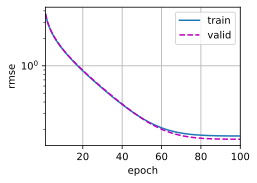

In [30]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64

train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, 
                          lr, weight_decay, batch_size)

print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [31]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
  net = get_net()
  train_ls, _ = train(net, train_features, train_labels, None, None,
                      num_epochs, lr, weight_decay, batch_size)

  d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
           ylabel='log rmse', xlim=[1, num_epochs], yscale='log')

  print(f'训练log rmse：{float(train_ls[-1]):f}')

  preds = net(test_features).detach().numpy()

  test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])

  submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)

  submission.to_csv('submission.csv', index=False)

训练log rmse：0.162536


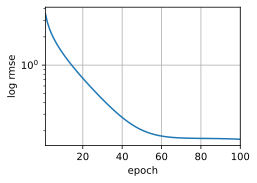

In [32]:
train_and_pred(train_features, test_features, train_labels, test_data, 
               num_epochs, lr, weight_decay, batch_size)

1. 把预测提交给Kaggle，它有多好？

log rmse 0.162536，排名3500多

2. 能通过直接最小化价格的对数来改进模型吗？如果试图预测价格的对数而不是价格，会发生什么？



3. 用平均值替换缺失值总是好主意吗？提示：能构造一个不随机丢失值的情况吗？

平均值的特点：简单快捷、无需额外数据、保持数据分布；可能引起偏差、忽略了变异性、对极值敏感、不适用于分类变量。

替代方法：中位数、众数、多重插补、预测模型。

电脑CPU不太好，等换电脑了再说吧

4. 通过K折交叉验证调整超参数，从而提高Kaggle的得分。

5. 通过改进模型（例如，层、权重衰减和dropout）来提高分数。

6. 如果我们没有像本节所做的那样标准化连续的数值特征，会发生什么？